<span style="color:red">Exam Grade: 34.58 </span>

Notes: Final Exam score is out of 40 pts. 


P1 grade: 

 P1.a grade: 9.5

 P1.b grade: 20

 P1.c grade: 5

P2 grade: 

 P2.a grade: 5
  Heaviest/lightest?

 P2.b grade: 9.2 
  Where did Jabba go?  You missed Jabba because of the try/except clause you used.

 P2.c grade: 6.8 
  You are performing something closer to an integral, summing over too many arguments and not 
  re-setting your arrays. You have two plots instead of one. Legend?
  
P3 grade:  9.5



## Final exam PHYS 248 [CRN 22465] / MATH 248 [CRN 22053]

* April 12th, 2019
* 7pm-10pm

* * *

Create in your **GitLab** repository a directory `mp248/Exams/Final` and copy this notebook into that directory. Answer all questions in your copy of `Final.ipynb` located in your `mp248/Exams/Final` directory. Add any additional files your asked to create to the  `mp248/Exams/Final` directory.

Ensure you push your partial work to your repository *early* and *often*. Check your commit push on the mp248 Git server.

**Notes**: 
* Invigilators will only offer help with **Git** issues until 20 minutes before the end of the exam.  Students that receive help on Git issues will be deducted **10%** from their exam grade.
* Electronic devices are not permitted. To have an electronic device of any kind (other than your laptop) in the exam setting, including a smartwatch or other wearable device, violates the [Policy on Academic Integrity](https://web.uvic.ca/calendar2019-01/undergrad/info/regulations/academic-integrity.html#) and will be reported. Students found communicating with one another in any way or having unauthorized books, papers, notes or electronic devices in their possession during a test or examination will be considered to be in violation of this policy. Similarly, having any active messenger apps is a violation of this policy.

* Specifically for this final exam:
    - You are required to use your own laptop, and access the course repository and your own repository via the abacus jupyter server.
    - You are allowed to access any Python related resources on the internet, such as Stack Overflow or the SciPy and Numpy web pages.
    - You are prohibited to have any communications during the exam with anybody through any means, except invigilators.
    - You must not make any commits to your repository after the end of the exams.
    
* Students must sign the sign-up sheet before leaving the exam. Students must sign out and in when using the bathroom. 

***

## Problem 1:

### 1.a [15%]
A mass is attached to a spring and can move in the vertical direction according to the upward directed restoring spring force and the downward directed force of gravity. The velocity and vertical position are described by the following differential equations. 
$$ \frac{dy}{dt} = v_\mathrm{y} \\
\frac{dv_\mathrm{y}}{dt} = -q_yy -g 
$$

Solve this system of ODEs using a scipy library for $g = 9.81$ and $q_\mathrm{y} = 1$ and $y_0 = -2$ ($y=0$ is the _ceiling_ where the spring is attached), for $t\in[0,50]$ with time steps $dt=0.01$. 

Make a plot of the vertical $y$ position as a function of time $t$. 

In [219]:
## This code block was used to check the code and I left it in because reasons
## Thanks for your understanding ! :)

# q=1
# q2=2
# g=9.81
# initial=[-2,0]

# def rhs_odeint(y,t,q,g):
#     'Evaluate RHS for skydiver problem, advance one time step'
#     hrhs = y[1]
#     vrhs = -q*y[0] - g
#     return [hrhs,vrhs]

#  y = integrate.odeint(rhs_odeint,initial,t, args=(q ,g))
# y2 = integrate.odeint(rhs_odeint,initial,t, args=(q2,g))

# plt.figure(figsize=(8,8))
# plt.axis('equal')
# plt.title("Mass spring system")
# plt.plot(t,y.T[0],label='q=1')
# plt.plot(t,y2.T[0],label='1=2')
# plt.xlabel('Time')
# plt.ylabel('Height')
# plt.legend()
# plt.show()

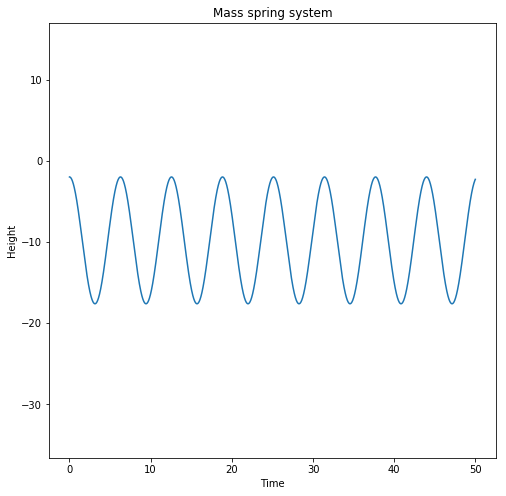

In [5]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
# integrate.odeint?
q=1
g=9.81
initial=[-2,0]
t = np.arange(0,50,0.01) #GR mixxing t array -0.5 (I see the plot in the notebook)
def rhs_odeint(y,t,q,g):
    'Evaluate RHS for skydiver problem, advance one time step'
    hrhs = y[1]
    vrhs = -q*y[0] - g
    return [hrhs,vrhs]
y = integrate.odeint(rhs_odeint,initial,t, args=(q,g))


plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title("Mass spring system")
plt.plot(t,y.T[0])
plt.xlabel('Time')
plt.ylabel('Height')
plt.show()

### 1.b [10%]

Save the $y$, $v_\mathrm{y}$ solution in a dictionary using the keys  `y` and `v_y` and make that dictionary the first element of a list with the name `spring`. Do the calculation again for $q_\mathrm{y} = 2$ using the same `t` array as in _1.a_. Save the results as a dictionary as well in the same way, as the second element of the list `spring`.

Make a plot of the y position for the case $q = 1$ against the position of the $q = 2$ case.

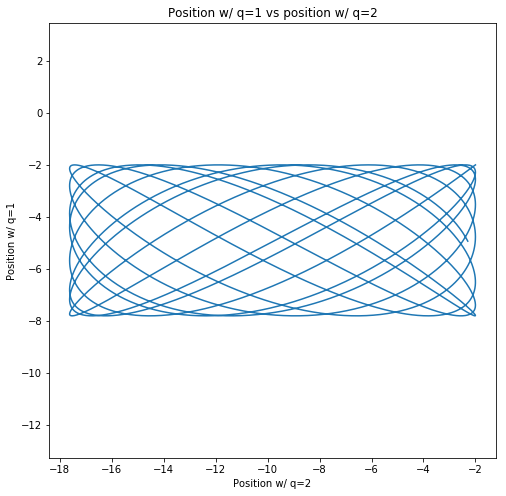

In [6]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

dict1=dict()
dict1['y']=y.T[0]
dict1['v_y']=y.T[1]
spring=[dict1]

q=2
g=9.81
initial=[-2,0]

def rhs_odeint(y,t,q,g):
    'Evaluate RHS for skydiver problem, advance one time step'
    hrhs = y[1]
    vrhs = -q*y[0] - g
    return [hrhs,vrhs]

y2 = integrate.odeint(rhs_odeint,initial,t, args=(q,g))

dict2=dict()
dict2['y']=y2.T[0]
dict2['v_y']=y2.T[1]
spring.append(dict2)
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.plot(spring[0]['y'],spring[1]['y'])
plt.title('Position w/ q=1 vs position w/ q=2')
plt.xlabel('Position w/ q=2')
plt.ylabel('Position w/ q=1')
plt.show()

### 1.c [15%]

To the mass in the previous problem there are now two additional _magic_ springs attached. The springs only pull horizontally, no matter what the vertical position is, and their restoring force is only acting when the mass is displaced to the side where the spring is attached, and opposite to that diplacement. (This last feature is easily accommodated if the horizontal rest position is chosen to be at $x=0$.) The horizontal spring constant is $q_\mathrm{x}=0.5$. There is another additional right-hand side term $-r {\bf v}^2 $ with $r = 0.1$, ${\bf v} = (v_\mathrm{x},v_\mathrm{y})$, which represents friction (e.g. air). 

* Write a function for the right-hand side, and solve for the same time interval as in _1.b_ for $r=0.1$, $q_\mathrm{x} = 0.5$ and $q_\mathrm{y} = 2.5$ and initial conditions $(x,y) = (1,-2)$ and $(v_\mathrm{x},v_\mathrm{y}) = (0,0)$.
* Make a plot of the $y$ vs $x$ position (trajectory) of the resulting motion.

[Possibly helpful: `sign(x)` is returning `+1` for `x>0` and `-1` for `x<0`.]


In [3]:
## yee nawh ty
## come back if time

qx=0.5
r=0.1

q=2.5
g=9.81
######### y height, y velocity, x height, x velocity
initial=[-2,0,1,0]
in_vel=[0,0]


#GR steps toward solution, rhs func substantial shortcomings 5/10


def rhs_sdiver_odeint(y,t,q,g,r):
    hrhs  = y[1]
    drhs  = 
    vyrhs = -q*y[0] - g
    vxrhs = -r*y[0]**2
    return [hrhs,(vxrhs,vyrhs)]

y3 = integrate.odeint(rhs_sdiver_odeint,initial,t, args=(q,g,r))

SyntaxError: invalid syntax (<ipython-input-3-0be509067c92>, line 15)

* * *

## Problem 2:

In the `SW.dat` subdirectory, you will find several `.json` files containing summary data from the *Star Wars* movies.  

The block of code below uses the **json** library to load these files into a dictionary object. 

The parts of this question will ask you to do some basic analysis of this data. First, spend a little time exploring your dictionary to see what kind of data it contains.

In [4]:
import fnmatch as fn  
import json
import os
## Build the list of directories of the weather files.
json_files = fn.filter(os.listdir('./SW.dat'), "*.json")
print(json_files)
swdat = dict()
for w in json_files:
    with open('./SW.dat/'+w) as f:
        data = json.loads(f.read())
        swdat[w.split('.')[0]] = data

['starships.json', 'species.json', 'vehicles.json', 'films.json', 'people.json', 'planets.json', 'transport.json']


### Part (a) [20%]


Using the above dictionary, compute and list the five **shortest** and the five **tallest** characters in the Star Wars movies.  Similarly, compute and list the five **heaviest** and the five **lightest**.

In [5]:
## https://docs.python.org/2/howto/sorting.html
## https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
##  first selected answer

import operator as op
height_dict=dict()
for n in range(len(swdat["people"])):
    name=swdat["people"][n]['fields']['name']
    try:
        height=int(swdat["people"][n]['fields']['height'])
    except ValueError:
        height=-1
    #     print(name,height)
    height_dict[name]=height
height_sorted=sorted(height_dict.items(),key=op.itemgetter(1),reverse=True)
# print(height_sorted)
print("The five tallest are: ", height_sorted[0:5])
print("The five shortest are: ", height_sorted[-6:-1:])

The five tallest are:  [('Yarael Poof', 264), ('Tarfful', 234), ('Lama Su', 229), ('Chewbacca', 228), ('Roos Tarpals', 224)]
The five shortest are:  [('R4-P17', 96), ('Dud Bolt', 94), ('Wicket Systri Warrick', 88), ('Ratts Tyerel', 79), ('Yoda', 66)]


### Part (b) [20%]

Make a matplotlib plot of character height vs. mass for all Star Wars characters. 

* Put height on the x-axis, and weight on the y-axis.  
* Include both a linear and quadratic least-squares approximation in your plot.  

After your plot, list the five characters whose mass deviates from the linear least squares interpolation by the largest amount.  Include the deviation in your answer.

In [6]:
## https://docs.python.org/2/howto/sorting.html
## https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
##  first selected answer

import operator as op
import matplotlib.pyplot as plt
hm_dict=dict()
troublesome_chars=[]
for n in range(len(swdat["people"])):
    name=swdat["people"][n]['fields']['name']
    try:
        height=int(swdat["people"][n]['fields']['height'])
        weight=float(swdat["people"][n]['fields']['mass'])
        hm_dict[name]=(height,weight)
    except ValueError:
        troublesome_chars.append(name)
        continue
#         print(name,"has been excluding for insufficient data")
# print(hm_dict)

# print("Characters below have been excluded as their height or their weight\
# \nhave unkown or non-sensical values\n")
print(troublesome_chars)

['Wilhuff Tarkin', 'Jabba Desilijic Tiure', 'Mon Mothma', 'Arvel Crynyd', 'Finis Valorum', 'Rugor Nass', 'Ric Olié', 'Watto', 'Quarsh Panaka', 'Shmi Skywalker', 'Bib Fortuna', 'Gasgano', 'Eeth Koth', 'Saesee Tiin', 'Yarael Poof', 'Mas Amedda', 'Cordé', 'Cliegg Lars', 'Dormé', 'Bail Prestor Organa', 'Taun We', 'Jocasta Nu', 'R4-P17', 'San Hill']


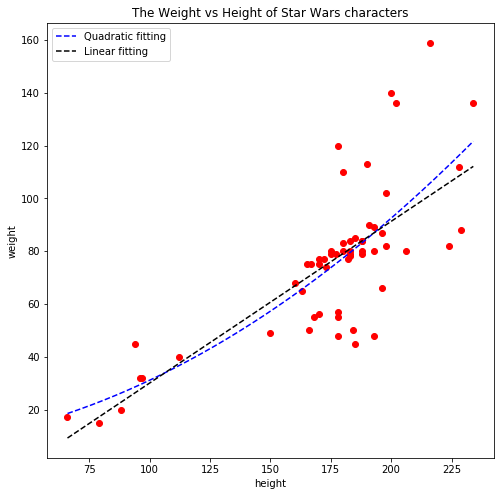

In [157]:
X=[];Y=[]
##############
## Plotting ##
##############

plt.figure(figsize=(8,8))
plt.title('The Weight vs Height of Star Wars characters')
plt.xlabel('height')
plt.ylabel('weight')

for n in hm_dict.keys():
    plt.plot(hm_dict[n][0],hm_dict[n][1],'ro')
    X.append(hm_dict[n][0]) ## heights
    Y.append(hm_dict[n][1]) ## weights
    

A = np.matrix([[1.0, x, x**2] for x in X]).T
y = np.matrix(Y).T
c = np.linalg.inv(A*A.T)*A*y

A_linear = np.matrix([[1.0, x] for x in X]).T
y_linear = np.matrix(Y).T
c_linear = np.linalg.inv(A_linear*A_linear.T)*A_linear*y

dom = np.linspace(min(X), max(X), 1000)
ran = [c[0,0] + c[1,0]*x + c[2,0]*x**2 for x in dom]
ran_linear=[c_linear[0,0] + c_linear[1,0]*x for x in dom]

plt.plot(dom,ran,'b--',label='Quadratic fitting')
plt.plot(dom,ran_linear,'k--',label='Linear fitting')
plt.legend()

plt.show()

### Part (c) [10%]

* Create a Sympy expression for the function 
$$f_{\mu,\sigma}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

* Plot the sum
$$\sum_h f_{h,\sigma}(x)$$
where $h$ ranges over the heights of all Star Wars characters. Include in your plot the case $\sigma=5$ and $\sigma=10$. Have $x$ range between the minimum and maximum heights of Star Wars characters.

**Note:** You will either need to convert $f$ into a callable Python function using Sympy's`lambdify` call, or you will need to use `subs` and `evalf` commands to evaluate to floats.

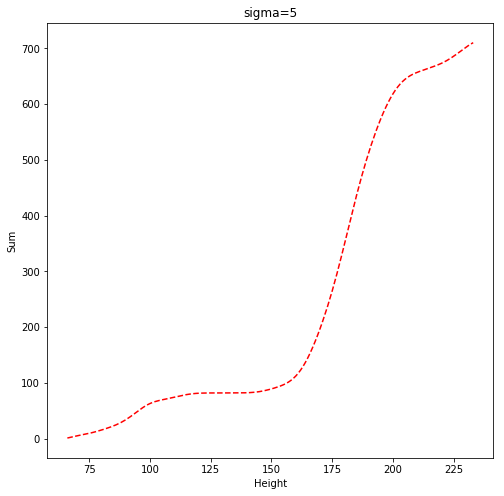

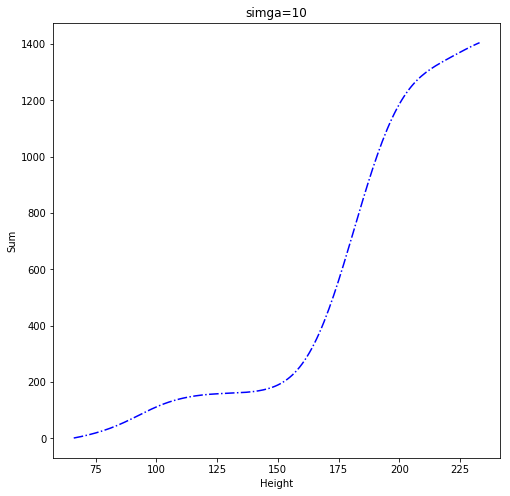

In [180]:
import sympy as sp
from numpy import exp
import matplotlib.pyplot as plt
# from numpy import exp
x=sp.Symbol('x')
lam=sp.Symbol('mu')
sigma1=5
sigma2=10
f1=(-1 * ( (x-lam)**2 / (2*sigma1**2) ) )
f2=(-1 * ( (x-lam)**2 / (2*sigma2**2) ) )
# sp.pprint(f1)
F1=sp.lambdify(x,f1)
F2=sp.lambdify(x,f2)
vals1=[];vals2=[]
X2=[];Y2=[];Y3=[]
for x in range(min(X),max(X),1):
    for h in X:
        val1=exp(float(F1(x).replace(lam,h)))
        vals1.append(val1)
        val2=exp(float(F2(x).replace(lam,h)))
        vals2.append(val2)
    X2.append(x)
    Y2.append(sum(vals1))
    Y3.append(sum(vals2))

plt.figure(figsize=(8,8))
plt.title("sigma=5")
plt.plot(X2,Y2,'r--')
plt.xlabel('Height')
plt.ylabel('Sum')
plt.show()
plt.figure(figsize=(8,8))
plt.title("simga=10")
plt.plot(X2,Y3,'b-.')
plt.xlabel('Height')
plt.ylabel('Sum')
plt.show()

* * *

## Problem 3 [10%]:

Write an executable shell script in a file with the name `shell_final.sh` which does the following. 

1. Change the present working directory to the root of the course repository.
1. Make a listing that shows all files in the course repository and save that listing in a file called `listing.short`.
2. Make a listing of the course repository and all sub directories and write that into a file called `listing.long`.
3. Add a command that outputs how many ipython notebook files are listed in `listing.long` and have the answer written into a file called `shell_answers.txt`.
4. Add a command that changes in `listing.long` all file endings `.ipynb` into `.newsuffix` and save the changed content into file `listing.changed`.
5. Move all the files that this script created back into your `Final` exam directory.


NOTE:
Some code was repurposed from stack exchange:
https://stackoverflow.com/questions/14827686/list-of-all-folders-and-sub-folders
User "Amber" provided me with code.

Thanks Amber!
